<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/Martin_Lukan_Linear_regression_3_Score_and_TrainTestSplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# Scoring and metrics
Last time, you did a multivariate linear regression. But how can you be sure this multivariate linear regression is better than an univariate ? You have to measure it !


## First regression
Let's begin with a first linear regression : create a new column `'predict_from_sun'` whith the prediction of MAX temperature from the SUNHOUR variable.

In [52]:
# Your code here :
X = df_weather[['MAX_TEMPERATURE_C']]
y = df_weather['SUNHOUR']
model_from_sun = LinearRegression().fit(X,y)
df_weather['predict_from_sun']=model_from_sun.predict(X)


## R2 score
The best possible R2 score is '1', when our prediction predicts perfectly the reality. Let's see what is our R2 score :

In [53]:
# Change the name of the model if it's necessary
model_from_sun.score(X, y)

0.47654554059087323

## Let's continue with 2 others regressions
- Second regression : create a new column 'predict_from_min' whith the prediction of MAX temperature from the MIN temperature variable
- Third regression : create a new column 'predict_from_both' whith the prediction of MAX temperature from the both variables (MIN temperature and Sunhours)

In [28]:
# Your code here :
X1 = df_weather[['MIN_TEMPERATURE_C']]
model_from_min=LinearRegression().fit(X1,y)
df_weather['predict_from_min']=model_from_min.predict(X1)

X2 = df_weather[['MIN_TEMPERATURE_C','SUNHOUR']]
model_from_both=LinearRegression().fit(X2,y)
df_weather['predict_from_both']=model_from_both.predict(X2)

## Calculate the R2 score of the 2 new predictions
Be careful : if you still use the same "X" name, you will overwrite it.

Which model has the best score ? Do you think it's logic ?

In [29]:
# Your code here :
print(f"Model from sunhour {model_from_sun.score(X, y)}")
print(f"Model from min  temperature {model_from_min.score(X1, y)}")
print(f"Model from min temp and sunhour {model_from_both.score(X2, y)}")

Model from sunhour 0.47654554059087323
Model from min  temperature 0.22236830089646967
Model from min temp and sunhour 1.0


# Train Test Split
One of biggest problems of Machine learning is : **overfitting**.



To be sure that machine didn't memorize the result, we use the Train Test Split methodology. We keep some data separate (often 25% of our initial dataset). Then we train our model on the 75% (the "Train set"). 
After, we can calculate a score on the "Test set".

Let's do that !

In [34]:
# Juste read and execute the code below
from sklearn.model_selection import train_test_split

X = df_weather[['SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

# Here, we split our 2 datasets (the variables "X" and the target "y") into 4 datasets X and y for the train set and X and y for the test set.
# We set the size of the train set to 75%. And the rest is for the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
print("The lenght of the initial dataset is :", len(X))
print("The lenght of the train dataset is   :", len(X_train))
print("The lenght of the test dataset is    :", len(X_test))

# Here we train the model only on the train dataset.
newmodel = LinearRegression().fit(X_train, y_train)

# And now we compare both scores :
print("\nScore for the Train dataset :", newmodel.score(X_train, y_train))
print("Score for the Test dataset :", newmodel.score(X_test, y_test))


The lenght of the initial dataset is : 365
The lenght of the train dataset is   : 273
The lenght of the test dataset is    : 92

Score for the Train dataset : 0.47243569075679914
Score for the Test dataset : 0.4749360350733982


## Both scores are very close, there is no overfitting, well done !

What happens if we don't randomize our dataset. Here, the model learns only on the 9 first months.

In [35]:
# Juste read and execute the code below
from sklearn.model_selection import train_test_split

X = df_weather[['MIN_TEMPERATURE_C']]
y = df_weather['MAX_TEMPERATURE_C']

# We set the size of the train set to 75%. And the rest is for the test set.
# We set the split NOT in random.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, shuffle = False)


# Here we train the model only on the train dataset.
newmodel = LinearRegression().fit(X_train, y_train)

# And now we compare both scores :
print("\nScore for the Train dataset :", newmodel.score(X_train, y_train))
print("Score for the Test dataset :", newmodel.score(X_test, y_test))


Score for the Train dataset : 0.7875765302008688
Score for the Test dataset : 0.03610833322378593


## There is an overfitting ! 
Indeed, the model get a good score on the Train dataset, because he learned in winter / spring / summer datas. But he get a bad score in Falls...

# Let's play !
Train a new model with all numeric variables (without your target of course) and try to have a better score than previously.

Remember to split randomly your dataset before training your model.

Display the Test score.

In [60]:
# Your code here :
# Juste read and execute the code below
from sklearn.model_selection import train_test_split

X4 = df_weather.select_dtypes(exclude='object')
X4 = X4.drop(columns=['MAX_TEMPERATURE_C','predict_from_sun'])
y4 = df_weather['MAX_TEMPERATURE_C']

# We set the size of the train set to 75%. And the rest is for the test set.
# We set the split NOT in random.
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, train_size = 0.75, shuffle = True)


# Here we train the model only on the train dataset.
model4 = LinearRegression().fit(X4_train, y4_train)

# And now we compare both scores :
print("\nScore for the Train dataset :", model4.score(X4_train, y4_train))
print("Score for the Test dataset :", model4.score(X4_test, y4_test))


Score for the Train dataset : 0.9943393344072284
Score for the Test dataset : 0.9920657694261865


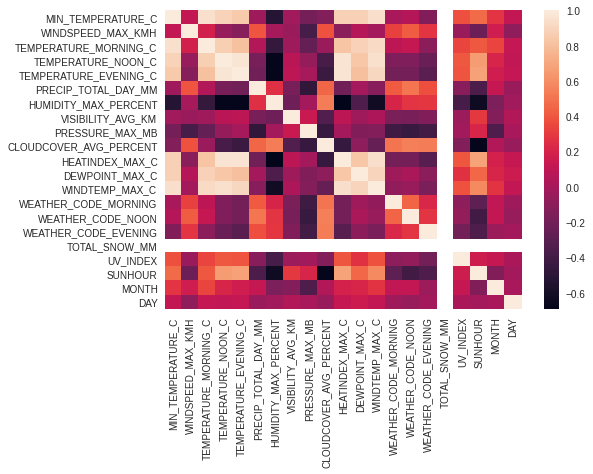

In [65]:
corr = X4.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

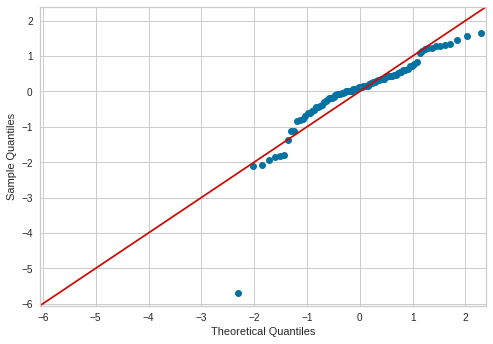

In [62]:
pred = model4.predict(X4_test)
diff= y4_test-pred

import statsmodels.api as sm
sm.qqplot(diff,fit=True,line='45')
plt.show()

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X4.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X4.values, i)
                          for i in range(len(X4.columns))]
  
print(vif_data)

                   feature         VIF
0        MIN_TEMPERATURE_C   90.120958
1        WINDSPEED_MAX_KMH   12.885831
2    TEMPERATURE_MORNING_C  113.968578
3       TEMPERATURE_NOON_C  326.192757
4    TEMPERATURE_EVENING_C  176.635682
5      PRECIP_TOTAL_DAY_MM    2.139978
6     HUMIDITY_MAX_PERCENT  260.076300
7        VISIBILITY_AVG_KM   22.946044
8          PRESSURE_MAX_MB  475.981247
9   CLOUDCOVER_AVG_PERCENT   20.465970
10         HEATINDEX_MAX_C  246.408903
11          DEWPOINT_MAX_C   82.274400
12          WINDTEMP_MAX_C  133.797569
13    WEATHER_CODE_MORNING    9.378510
14       WEATHER_CODE_NOON   10.175066
15    WEATHER_CODE_EVENING    9.077658
16           TOTAL_SNOW_MM         NaN
17                UV_INDEX    2.955616
18                 SUNHOUR   30.852544
19                   MONTH    6.796598
20                     DAY    4.578630


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning:

invalid value encountered in double_scalars

